This is a log analysis camera + ROS Eloquent running on Raspberry Pi Zero:
- Conversion duration: Time taken to perform conversion of YUVV to RGB (in us)
- Publish duration: Time taken publish an image (in us, `publisher->publish(msg)`). 
- Total duration: Time taken to create the message object, fill the message object and publish (in us, this also includes previous two time measurement)

Text(0, 0.5, 'Time [ms]')

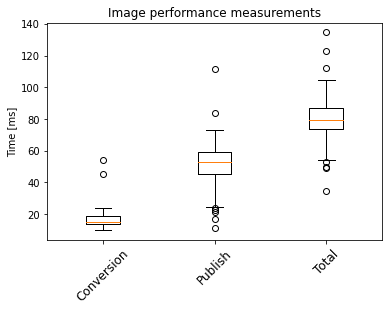

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import re

conversion_ms = []
publish_ms = []
total_ms = []

file = open('data/ros_conversion_publishing.log')
for line in file.readlines():
    found = re.findall(r'Conversion duration: (\d*)', line)
    if found:
        conversion_ms.append(int(found[0]) / 1000.0)
        
    found = re.findall(r'Publish duration: (\d*)', line)
    if found:
        publish_ms.append(int(found[0]) / 1000.0)
        
    found = re.findall(r'Total duration: (\d*)', line)
    if found:
        total_ms.append(int(found[0]) / 1000.0)
    

fig, ax = plt.subplots(1, 1)
ax.boxplot([conversion_ms, publish_ms, total_ms])
ax.set_xticklabels(['Conversion', 'Publish', 'Total'], rotation=45, fontsize=12)
ax.set_title('Image performance measurements')
ax.set_ylabel('Time [ms]')